In [1]:
import numpy as np
import cv2
import os

import matplotlib.pyplot as plt
%matplotlib inline

###  Define handy functions

**Useful vis function**

In [2]:
def show_image(orig_img, processed_img):
    fig, ax = plt.subplots(1, 2, figsize=(20, 20))
    _ = ax[0].axis('off')
    _ = ax[0].imshow(orig_img)
    _ = ax[1].axis('off')
    _ = ax[1].imshow(processed_img, cmap='gray')
    plt.show()

**Text detection itself**

In [146]:
def text_detection(img):
    
    # apply threshold
    optimal_threshold, _ = cv2.threshold(img, 0, 1, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # check for background
    if np.quantile(img, 0.6) < optimal_threshold:
        img = 1 - img
    
    # apply blur
    img = cv2.GaussianBlur(img, (3, 3), 0)
    
    # apply adaptive thresholding
    img = cv2.adaptiveThreshold(img, 1, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 7, 7)
    
    # post processing
    img = cv2.GaussianBlur(img, (5, 5), 0)
    
    return img

In [147]:
for root, dir, files in os.walk('./data/text/'):
    img_paths = [os.path.join(root, file) for file in files]

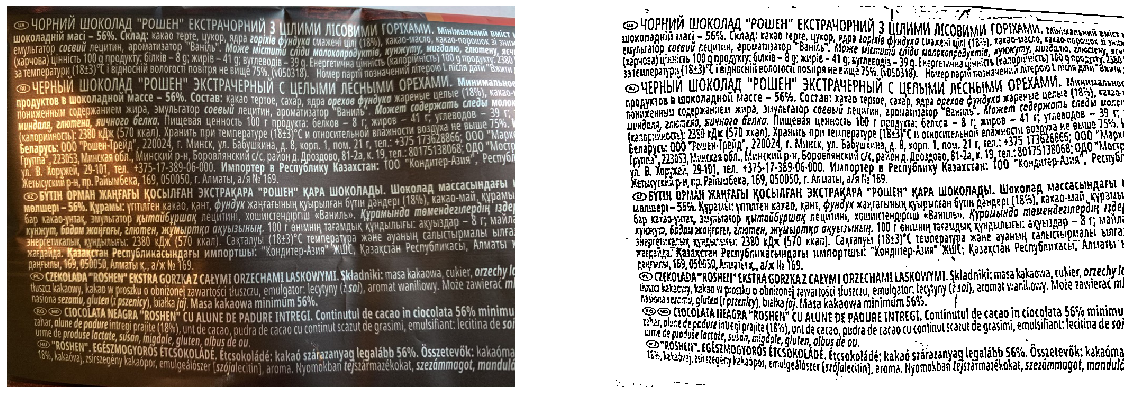

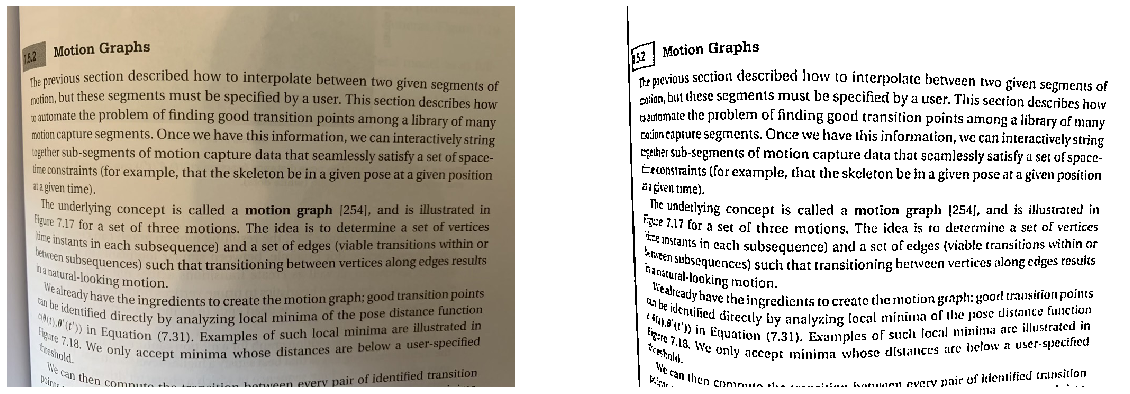

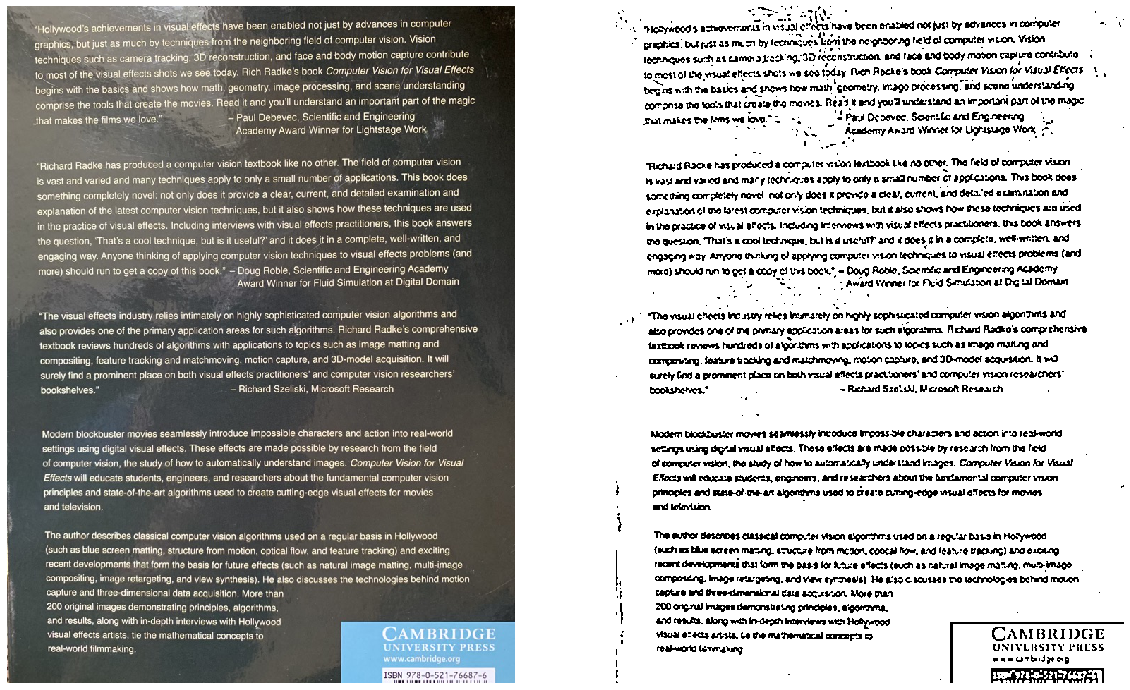

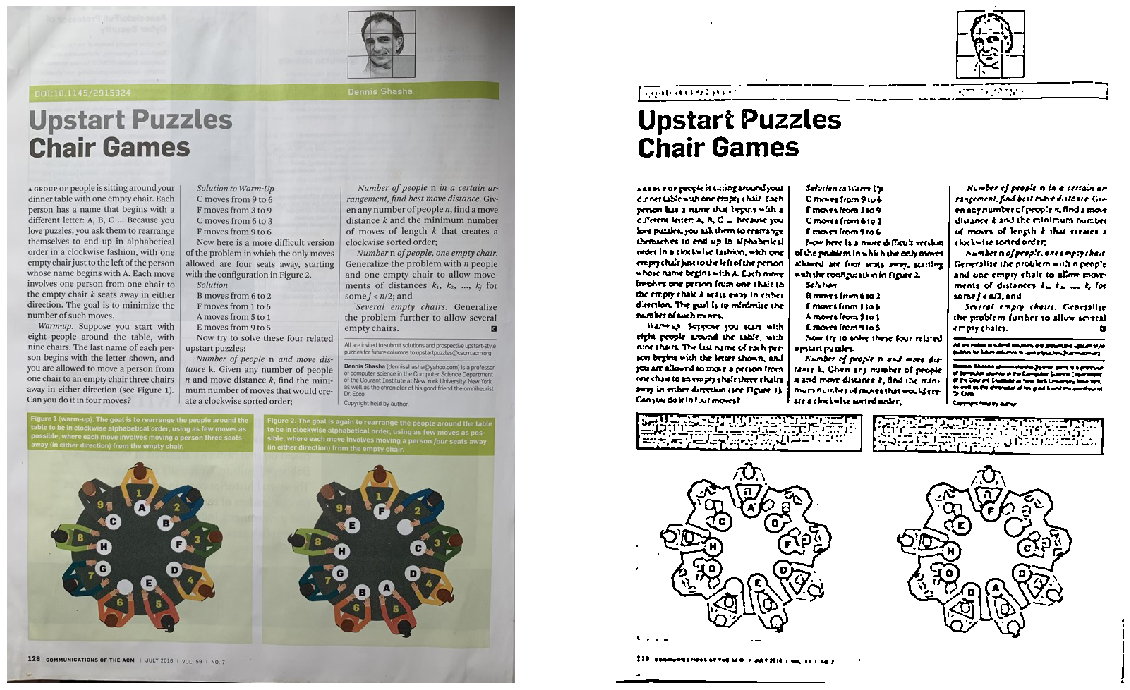

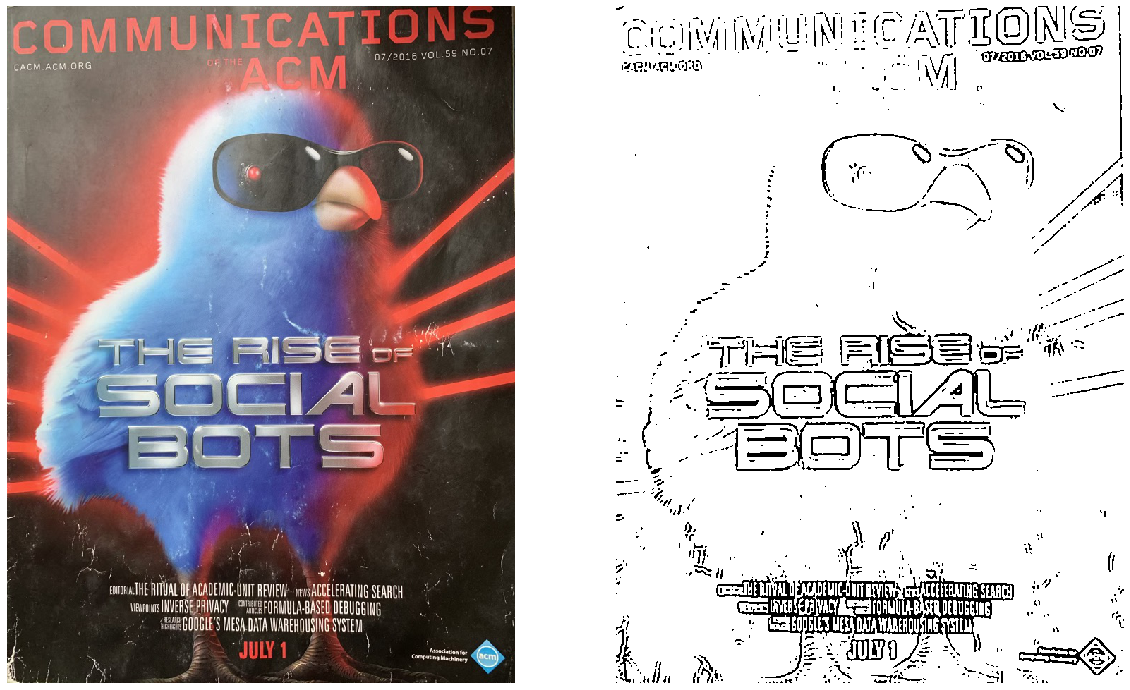

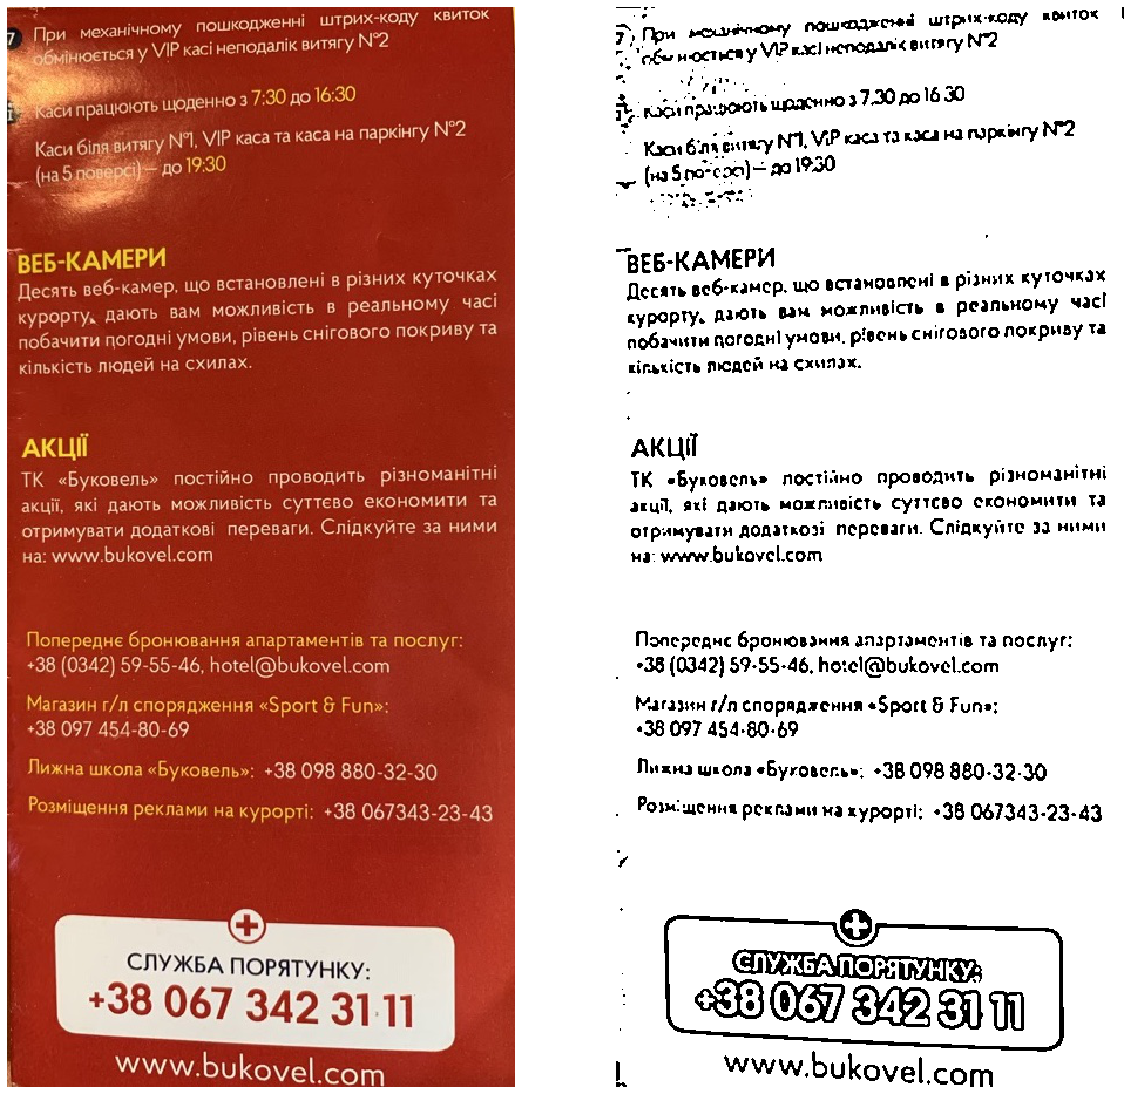

In [148]:
for img_path in img_paths:
    
    # read image
    img = cv2.imread(img_path)
    
    # get original image in RGB for visualization
    orig_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # get image in grayscale for further processing
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # get text mask
    detected_text = text_detection(img)
    
    # show results
    show_image(orig_img, detected_text)